In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [3]:
#understanding the data set
#it includes exploring its shape, describe,info, this all will give a rough insight of the database


In [4]:
df.shape

(18249, 14)

In [5]:
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:

df.info()
# there r three columns with object types
# there r no null values in our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
#lets confirm the over all null values
df.isnull().sum().sum()

0

In [13]:
#now we can proceed with the pre processing
#lets first get rid of the unmanted column from the data set
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
#lets recheck
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
# lets get the count of type column ,to check isits count
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [17]:
#looks like  the counts are almost similar ,dataset is balanced
#average price ....lets check its distribution over a graph


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

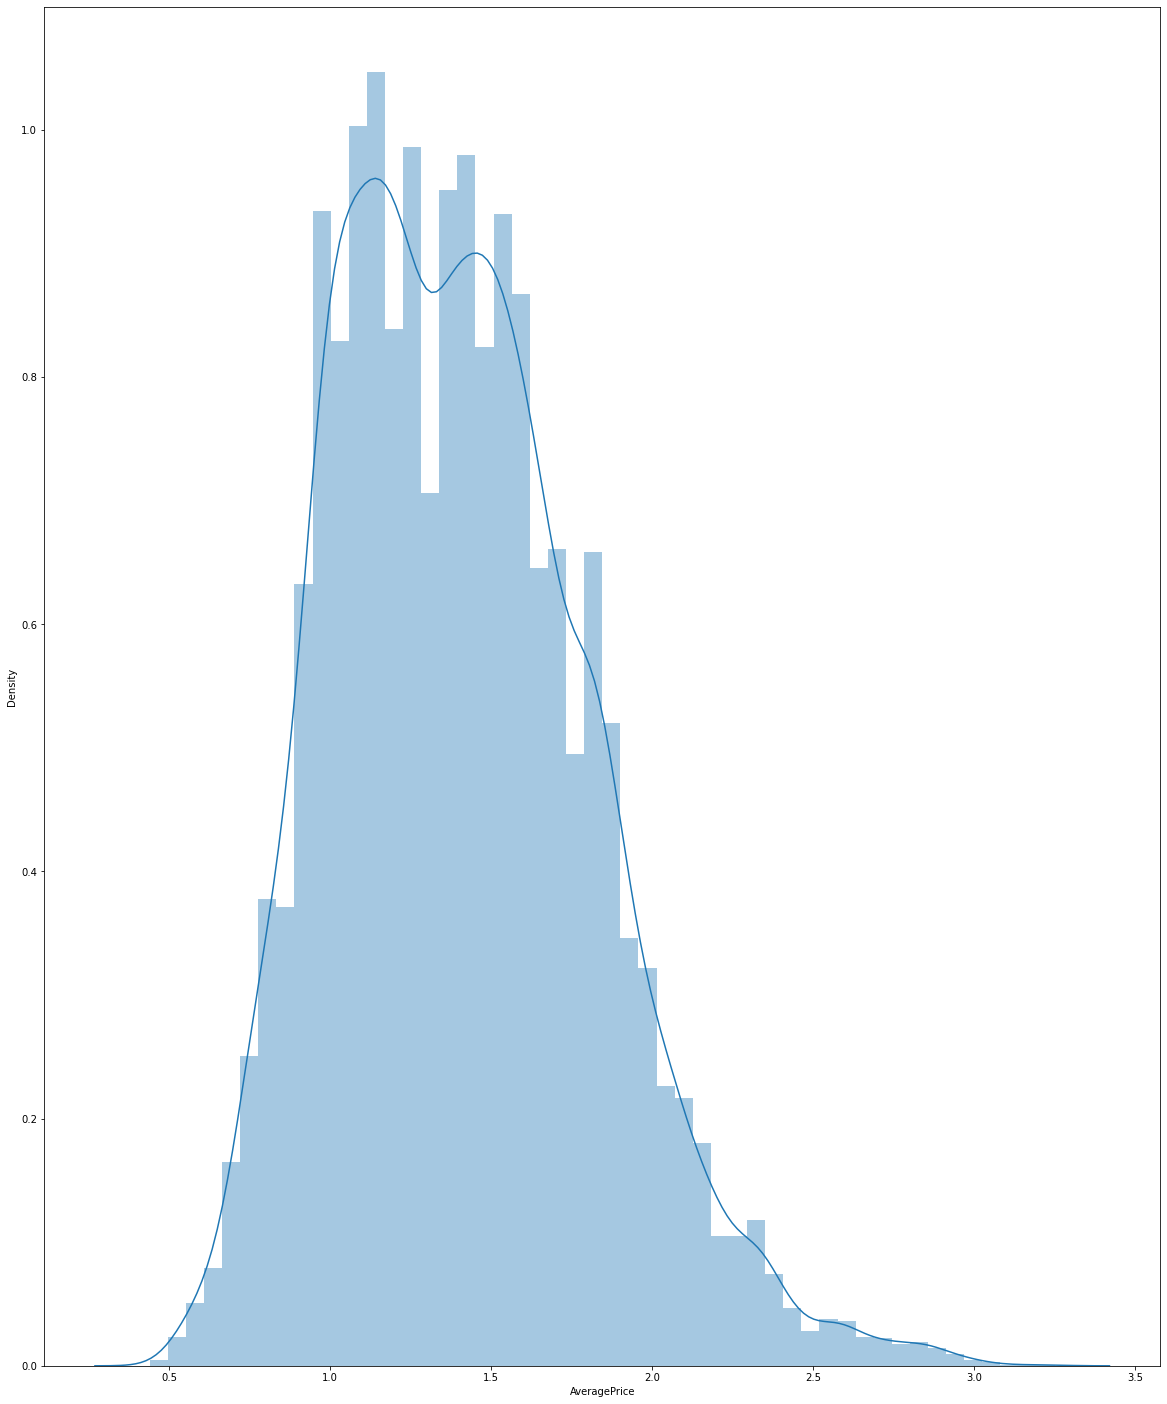

In [18]:
plt.figure(figsize=(20,25))
sns.distplot(df['AveragePrice'])
plt.xlabel(df['AveragePrice'],fontsize=10)

<AxesSubplot:>

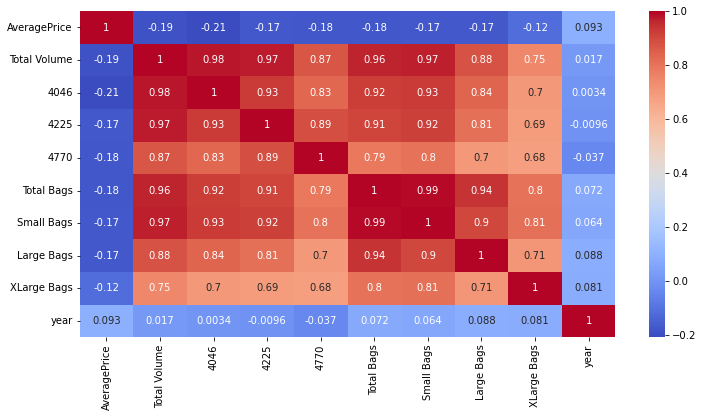

In [19]:
# plot aheat map TO ESTABLISH RELATION BETWEEN VARIABLES WITH INDEPENDENT VARIABLES
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
#it can be infereed that all the columns are not very mch related to average price

In [ ]:
#we can also check the individual reltionship of few columns with the average price

In [21]:
#plotting the scatterplot for all the column values


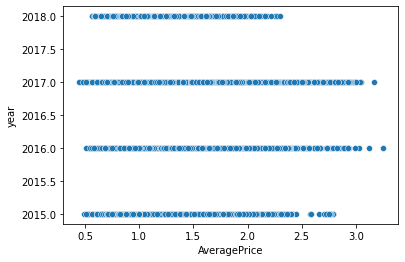

In [22]:
sns.scatterplot(x="AveragePrice", y="year", data=df);
#hence the average price was more in 2016-2017

Text(0.5, 1.0, 'Type Average Price in Each Region')

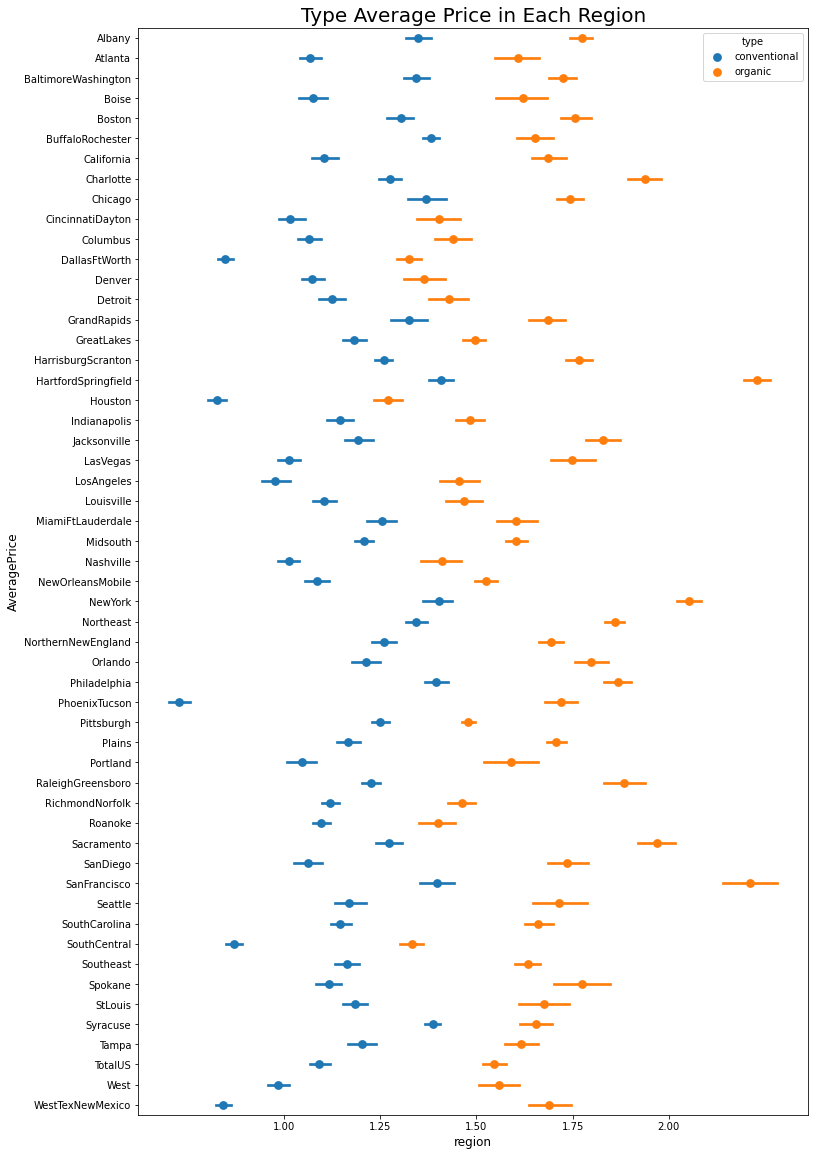

In [50]:
plt.figure(figsize=(12,20))
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})


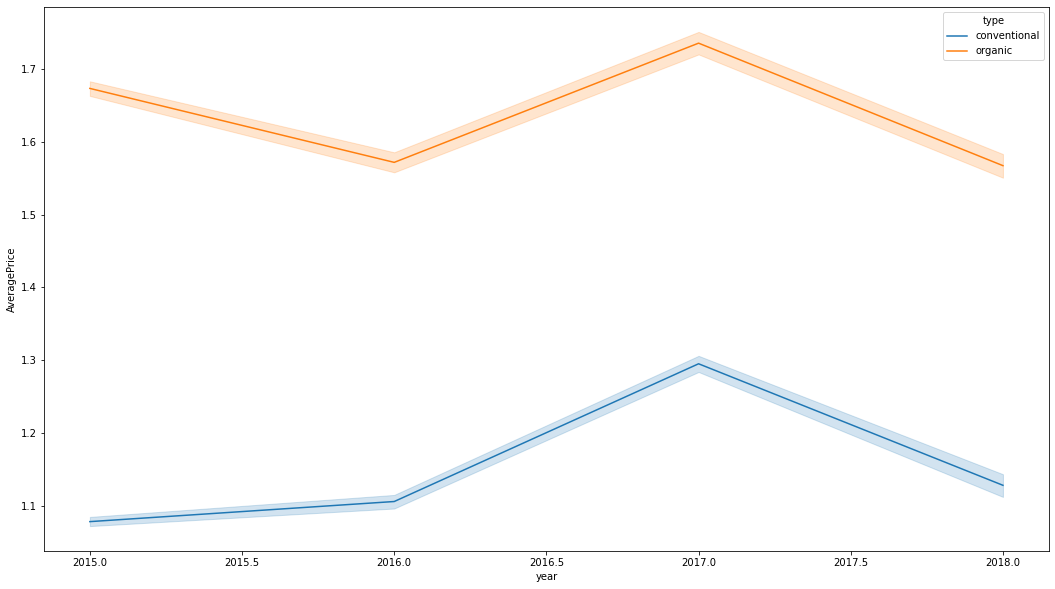

In [39]:
plt.figure(figsize=(18,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

In [ ]:
#looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

In [56]:
df['region'].nunique()

54

In [57]:
df['type'].nunique()

2

In [58]:
#As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.



In [60]:
df=pd.get_dummies(df.drop(['region'],axis=1),drop_first=True)

In [61]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Date_2018-01-28,Date_2018-02-04,Date_2018-02-11,Date_2018-02-18,Date_2018-02-25,Date_2018-03-04,Date_2018-03-11,Date_2018-03-18,Date_2018-03-25,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,1,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,1,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

In [64]:
X=df_final.iloc[:,1:14]
Y=df_final['AveragePrice']
#spliting the data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=29)


In [65]:
#model installing and training
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_train)
pred


array([1.4618947 , 1.40351052, 1.42047454, ..., 1.30741012, 1.38172305,
       1.46097002])

In [66]:
#now we will predict the values on test dat to check the performance of my model
Y_pred=lr.predict(X_test)

In [67]:
#we will check r2 score for both train and test data
print('Training data',r2_score(Y_train,pred))
print('testing data',r2_score(Y_test,Y_pred))

Training data 0.0595649688233123
testing data 0.06028302690915144


In [76]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 0.31
Mean squared error = 0.15
Median absolute error = 0.28
Explain variance score = 0.06
R2 score = 0.06


In [ ]:
#The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions


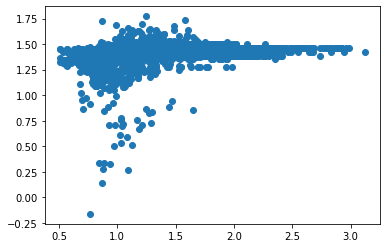

In [80]:
plt.scatter(x=Y_test,y=Y_pred)

In [ ]:
#s we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data
Lets try working with the Decision Tree Regression model

### DECISION TREE REGRESSOR MODEL


In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)


Text(0, 0.5, 'Predicted Y')

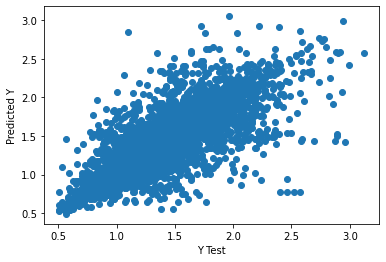

In [84]:
plt.scatter(x=Y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [85]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))


MAE: 0.16687047994740303
MSE: 0.06834606618452772
RMSE: 0.261430805729791


In [ ]:
# our RMSE is lower than the previous one we got with Linear Regression. Now try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor




In [86]:
#### Random frorest regressor model

In [88]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)


In [91]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 0.12058654394039009
MSE: 0.03029308909489371
RMSE: 0.1740490996670012


In [ ]:
# the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

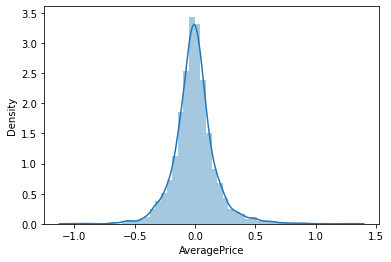

In [92]:
sns.distplot((Y_test-pred),bins=50)

In [ ]:

#esiduals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.
#The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
# through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
#THERE HAS TO BE APPROPRATRATE MODEL TO BE SELECED BASED ON THE INDEPENDENT VARIABLES ...U HAVE TO SELECT MODEL FOR CONTINOUSAND CATREROGICAL DATA
